In [1]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from nltk.corpus import stopwords
import re
import string
import nltk
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import roc_curve, auc

from scipy import interp
from itertools import cycle

mpl.rcParams['figure.figsize']=(10.0,8.0)    #(6.0,4.0)
mpl.rcParams['font.size']=10                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1


category_index = {"1":1, "-1":0}
category_reverse_index = dict((y,x) for (x,y) in category_index.items())

C:\Users\Laptop\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Laptop\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
training=pd.read_csv('D:/KULIAH S2/TESIS/CNN/datapakemay.csv',engine='python')
pd.options.display.max_colwidth=2000

tags = training.Class
texts = training.Tweet
print(training.head())

AttributeError: 'DataFrame' object has no attribute 'Class'

In [203]:
tags.value_counts()

0    1201
1     299
Name: Class, dtype: int64

c:\users\laptop\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


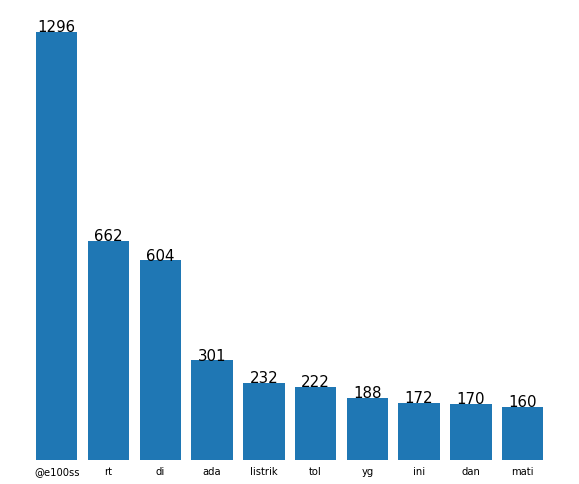

In [167]:
# Create a list of words by converting to lowercase and splitting
kata = [s.lower().split() for s in texts if s]
noline_ = [sublist for l in kata for sublist in l]
counts1 = dict(Counter(noline_).most_common(10))
labels1, values1 = zip(*counts1.items())

# sort your values in descending order
indSort1 = np.argsort(values1)[::-1]

# rearrange your data
labels1 = np.array(labels1)[indSort1]
values1 = np.array(values1)[indSort1]

indexes1 = np.arange(len(labels1))

bar_width = 1

mybar=plt.bar(indexes1, values1)
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# plt.show()

# direct label each bar with Y axis values
for bari in mybar:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=15)
# add labels
plt.xticks(indexes1, labels1)
plt.show()

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
a = vec.fit_transform(texts)
terms1 = vec.get_feature_names()
print(len(terms1))

4192


In [184]:
#preprocessing

#hapus url-link
train_nolink=[]
for line in texts:
    result=re.sub(r"http\S+","",line)
    train_nolink.append(result)

#hapur retweet
train_noRT=[]
for line in train_nolink:
    result=re.sub(r"RT","",line)
    train_noRT.append(result)
    
#remove username
train_nousername=[]
for line in train_noRT:
    result=re.sub(r"(?:\@|https?\://)\S+", "", line)
    train_nousername.append(result)

#hapus angka
from string import digits
train_nodigits=[]
for line in train_nousername:
    remove_digits=str.maketrans(' ', ' ', digits)
    result=line.translate(remove_digits)
    train_nodigits.append(result)
    
#replace , menjadi whitespace
training_nocomma=[]
for line in train_nodigits :
    result=re.sub(r"[,./]+", " ", line)
    training_nocomma.append(result)
    
#remove punctuations
train_nopunc=[]
for line in training_nocomma:
    punc = set(string.punctuation)
    result = ''.join(x for x in line if x not in punc)
    train_nopunc.append(result)

#case folding
train_lower=[]
for line in train_nopunc:
    a=line.lower()
    train_lower.append(a)

#import stopword
stop=open('D:\KULIAH S2\TESIS\CNN\stopword zakya.csv', 'r',encoding='utf8')
stopword = []
# Convert lines into string list.
for line in stop.readlines():
    stopword.append(line.rstrip())
    
from nltk.tokenize import word_tokenize
#hapus stopword
trainfinal = []
for line in train_lower: 
    word_token = nltk.word_tokenize(line) # get word token for every line (split line into each separate words)
    word_token = [word for word in word_token if not word in stopword] # remove indonesian stop words
    trainfinal.append(" ".join(word_token))
#tokenizing
from nltk.tokenize import word_tokenize
token_keluhan=[]
for line in trainfinal:
    b = nltk.word_tokenize(line)
    token_keluhan.append(b)

c:\users\laptop\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


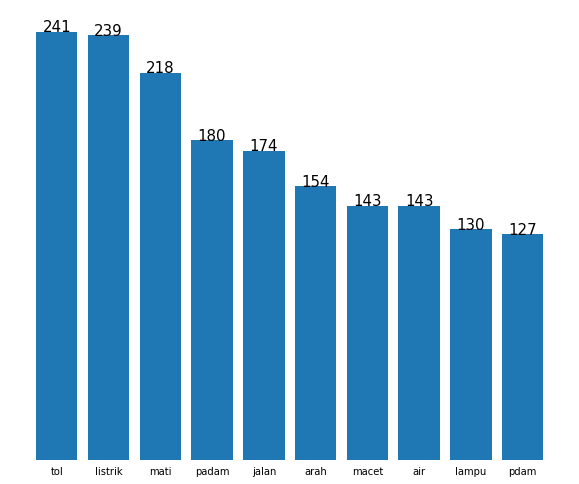

In [170]:
#hitung 10 term terbanyak setelah preprocessing
token = [sublist for l in token_keluhan for sublist in l]
counts = dict(Counter(token).most_common(10))
labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 1

mybar=plt.bar(indexes, values)
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# plt.show()

# direct label each bar with Y axis values
for bari in mybar:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=15)
# add labels
plt.xticks(indexes, labels)
plt.show()

In [185]:
#hitung jumlah terms setelah preprocessing
vec_2 = CountVectorizer()
a2 = vec.fit_transform(trainfinal)
terms2 = vec.get_feature_names()
print(len(terms2))

2975


In [186]:
#membuat DTM
vec = CountVectorizer()
X = vec.fit_transform(trainfinal)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,abis,ac,acara,action,ad,ada,adakan,adat,adeeemmmm,adha,...,yatoma,yg,yl,ylaporan,ylkiid,yo,yonosuwoyodepan,zebra,zone,zuwuuun
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
#membuat data frame anggota klaster 
train_final_df=pd.DataFrame(trainfinal)
train_final_df.columns=['tweet']
train_final_df['class']=pd.Series(tags, index=training.index)
train_final_df

,tweet,class
0,lho mas nama jalannya totok kerot maps jalan daerah majapahit berasap tebal bau…,0
1,agustus mati total internet detik,0
2,perbaikan selesaiselesai konfirmasi petugas,0
3,mohon info jl totok kerot majapahit mojokerto berasap tebal bau,0
4,delay dibandara juanda shrsnya brgkt jm smpe skrng tanda mw diberangkatkan,0
5,alhamdulillah listrik menyala terima,1
6,kegiatan dilangsungkan oktober desember kegiatan hasil kerjasama pemkot…,1
7,travo meledak blok b ditangani pln,0
8,kawasan kembang kuning mati lampu info,0
9,sosialisasi etoll paksa pakai etoll kartu brizzi pakai,0


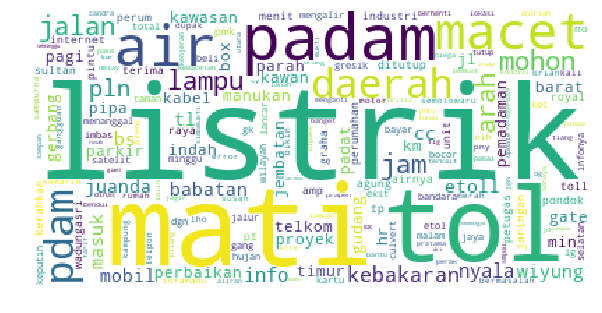

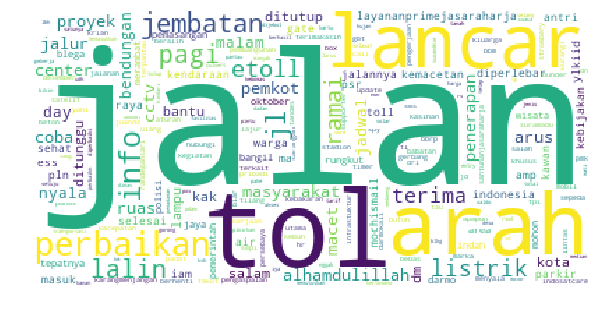

In [188]:
num_class=2
a = {}
b = {}
klaster = {}
i = -1
c = {}
for j in range(num_class):
    i += 1
    a[i] = train_final_df.loc[train_final_df['class'] == i,'tweet']
    b[i] =' '.join(a[i])
    klaster["class" + str(i)]  = b[i]
    c[i]= WordCloud(collocations = False,background_color='white',stopwords=stopword,max_words=2000,max_font_size=200,random_state=30).generate(b[i])
    fig = plt.figure(1)
    plt.imshow(c[i])
    plt.axis('off')
    plt.show()

In [189]:
df.to_csv('dtm.csv', sep='\t', encoding='utf-8')

In [190]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
tf_vectorizer = CountVectorizer(min_df=1)
tf = tf_vectorizer.fit_transform(trainfinal)
tf.shape[1]

2975

In [191]:
for i, feature in enumerate(tf_vectorizer.get_feature_names()):
    print(i, feature)
    

0 abis
1 ac
2 acara
3 action
4 ad
5 ada
6 adakan
7 adat
8 adeeemmmm
9 adha
10 adil
11 adl
12 adlh
13 admin
14 agar
15 agen
16 agt
17 agung
18 agustus
19 ahmad
20 aini
21 air
22 aireduaubdedubuaaeduaubdedubuaa
23 airnya
24 ajaib
25 ajang
26 ajur
27 akbar
28 akhirn
29 akibat
30 akp
31 akses
32 aksi
33 aktif
34 al
35 ala
36 alam
37 alamat
38 alangkah
39 alasan
40 alat
41 alatbpembayaran
42 alfa
43 alfamart
44 alhamdulillah
45 aliran
46 allah
47 allhamdulilah
48 aloha
49 alohawaru
50 alternatif
51 aman
52 amble
53 ambles
54 amblesnya
55 ambrol
56 amit
57 amp
58 ampel
59 ampun
60 an
61 anak
62 and
63 andai
64 andong
65 ane
66 aneh
67 anggaswangi
68 angka
69 angkat
70 angkot
71 anom
72 anomali
73 answer
74 antisipasi
75 antre
76 antrean
77 antri
78 antrian
79 antriannya
80 ap
81 apapun
82 apartment
83 api
84 apkh
85 applause
86 arah
87 area
88 argo
89 arjuno
90 arteri
91 arti
92 arua
93 arus
94 arusnya
95 asa
96 asalan
97 asap
98 asapnya
99 asas
100 asem
101 asemrowo
102 asih
103 aspal
104 a

840 guebeng
841 gula
842 gulita
843 gumitir
844 gunanya
845 gunung
846 gunungsari
847 gunungsarisatelit
848 ha
849 habis
850 habks
851 hadehhhh
852 hadiah
853 haduh
854 hahaha
855 hahahah
856 hajat
857 hajatan
858 hak
859 halaman
860 halim
861 halo
862 hambatan
863 hany
864 hape
865 hapenya
866 harap
867 harapan
868 harga
869 harmoni
870 harta
871 harysnya
872 hasil
873 hasilnya
874 hayo
875 hbo
876 hc
877 hd
878 he
879 heavy
880 hee
881 hehe
882 hehehe
883 help
884 hem
885 hemat
886 heran
887 hi
888 hidup
889 hidupnya
890 hij
891 hijau
892 hijaunya
893 hijrah
894 hiks
895 hilang
896 hilir
897 hindari
898 hitam
899 hjn
900 hmpir
901 hnya
902 home
903 hotel
904 hp
905 hr
906 hrg
907 hri
908 hrpn
909 hrs
910 hrsny
911 hrsnya
912 hrus
913 ht
914 htt
915 hub
916 hubungi
917 hujan
918 hukum
919 hukumannya
920 hutan
921 iam
922 iamy
923 ibuu
924 id
925 ide
926 identik
927 idul
928 ijin
929 ijo
930 ikan
931 iki
932 iku
933 ikudishub
934 ikutan
935 ilegal
936 imbas
937 indah
938 indi
939 indie

1589 mengantiwiyung
1590 mengarah
1591 mengatur
1592 mengecek
1593 mengecewakan
1594 mengecil
1595 mengelola
1596 mengenaskan
1597 mengganggu
1598 menggeluh
1599 menggenang
1600 menghentikan
1601 menghindari
1602 menghiraukan
1603 menghubungi
1604 mengoperasikan
1605 menguji
1606 menguntung
1607 mengurai
1608 mengutamakan
1609 menimbulkan
1610 menindaklanjuti
1611 menit
1612 menitan
1613 menjelang
1614 menjuntai
1615 mental
1616 menteri
1617 mentri
1618 menunggu
1619 menuruti
1620 menutup
1621 menyala
1622 menyalahgunakan
1623 menyapa
1624 menyebabkan
1625 menyebrangpun
1626 menyediakan
1627 menyelwsaikan
1628 menyumber
1629 menyusahkan
1630 merah
1631 merahnya
1632 merambat
1633 merana
1634 merayap
1635 merem
1636 merepotkan
1637 merespon
1638 merisi
1639 merisiampjagir
1640 merr
1641 mertoyudan
1642 merugikan
1643 mesin
1644 messi
1645 mesti
1646 mestinya
1647 met
1648 meter
1649 meteran
1650 meterannya
1651 metode
1652 metropolitan
1653 mggu
1654 mgkn
1655 mgu
1656 mhon
1657 midi
16

2339 saur
2340 sawotratap
2341 sawunggaling
2342 sayang
2343 sbelah
2344 sbelm
2345 sbg
2346 sbgmn
2347 sblm
2348 sblmnya
2349 sbtu
2350 sbymanyar
2351 scorpioenjoy
2352 sd
2353 sdah
2354 sdh
2355 sdkit
2356 sdtopo
2357 se
2358 sebagi
2359 sebelah
2360 sebentar
2361 sebisa
2362 sebulan
2363 sebulanan
2364 security
2365 seda
2366 sedati
2367 sedenganmijenkrian
2368 sedih
2369 seeh
2370 seger
2371 segini
2372 sehari
2373 sehat
2374 sehingg
2375 sejam
2376 sekalinya
2377 sekedar
2378 sekian
2379 sekitaran
2380 sekolah
2381 sekolahan
2382 sekring
2383 seksi
2384 sektor
2385 selam
2386 selamat
2387 selang
2388 selasa
2389 selatan
2390 selebar
2391 selesai
2392 selesaimhn
2393 selesaiselesai
2394 selokan
2395 semalam
2396 semalem
2397 semambung
2398 semangat
2399 sembarangan
2400 sememi
2401 semestuny
2402 seminggu
2403 semoga
2404 semolowaru
2405 sempet
2406 sempi
2407 sempit
2408 semu
2409 semuanyaaa
2410 semudah
2411 senang
2412 senayan
2413 seng
2414 senin
2415 senkom
2416 sensi
2417 sen

In [192]:
#Sparsicity is nothing but the percentage of non-zero datapoints in the document-word matrix, that is data_vectorized.

#Since most cells in this matrix will be zero, I am interested in knowing what percentage of cells contain non-zero values.

# Materialize the sparse data
data_dense = tf.todense()

# Compute Sparsity = Percentage of Non-Zero cells
print("Sparsity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsity:  0.2940504201680672 %


In [193]:
MAX_NB_WORDS = 200000
MAX_SEQUENCE_LENGTH = tf.shape[1]
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(trainfinal)

trainfinal_sequences = tokenizer.texts_to_sequences(trainfinal)

trainfinal_data = pad_sequences(trainfinal_sequences, maxlen=MAX_SEQUENCE_LENGTH)
word_index = tokenizer.word_index

In [194]:
print("train final shape: ", trainfinal_data.shape)

data = np.vstack((trainfinal_data))
category = pd.concat([training['Class']]).values
category = to_categorical(category)
print("-"*10)
print("combined data shape: ", data.shape)
print("combined category/label shape: ", category.shape)

train final shape:  (1500, 2975)
----------
combined data shape:  (1500, 2975)
combined category/label shape:  (1500, 2)


In [195]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
token_keluhan=[]
for line in trainfinal:
    b = nltk.word_tokenize(line)
    token_keluhan.append(b)

model = Word2Vec(token_keluhan, min_count=1, alpha=0.025, size=100)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['jalan'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)
w=model[model.wv.vocab]
print(w)

Word2Vec(vocab=3060, size=100, alpha=0.025)
['lho', 'mas', 'nama', 'jalannya', 'totok', 'kerot', 'maps', 'jalan', 'daerah', 'majapahit', 'berasap', 'tebal', 'bau…', 'agustus', 'mati', 'total', 'internet', 'detik', 'perbaikan', 'selesaiselesai', 'konfirmasi', 'petugas', 'mohon', 'info', 'jl', 'mojokerto', 'bau', 'delay', 'dibandara', 'juanda', 'shrsnya', 'brgkt', 'jm', 'smpe', 'skrng', 'tanda', 'mw', 'diberangkatkan', 'alhamdulillah', 'listrik', 'menyala', 'terima', 'kegiatan', 'dilangsungkan', 'oktober', 'desember', 'hasil', 'kerjasama', 'pemkot…', 'travo', 'meledak', 'blok', 'b', 'ditangani', 'pln', 'kawasan', 'kembang', 'kuning', 'lampu', 'sosialisasi', 'etoll', 'paksa', 'pakai', 'kartu', 'brizzi', 'bayar', 'tol', 'cash', 'dibilang', 'kartunya', 'digempol', 'kereta', 'api', 'penataran', 'dhoho', 'jurusan', 't', 'agung', 'jam', 'gerbong', 'ac', 'sumuk', 'duech', 'selamat', 'kesaktian', 'pancasila', 'syg', 'babatan', 'indah', 'off', 'sakti', 'blas', 'perum', 'griya', 'mukti', 'yach', '

c:\users\laptop\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app



[[ 4.7062491e-03 -4.0495843e-03 -5.0576194e-03 ... -2.2129081e-03
   9.1549911e-04 -2.5720776e-03]
 [-2.5199933e-03  2.5435400e-03 -6.1525300e-04 ... -5.2102813e-03
   2.4532254e-03 -3.2656011e-04]
 [ 4.0313010e-03 -1.3313818e-03 -4.7858330e-04 ... -9.4827818e-05
  -3.9316318e-03  1.1001201e-04]
 ...
 [-1.1547782e-03  2.7615232e-03  3.1355752e-03 ...  4.1407216e-03
  -2.8900614e-03 -4.1931383e-03]
 [ 2.4500948e-03  1.1763632e-03  1.4816889e-03 ...  1.8511057e-03
  -2.4622895e-03 -2.0668267e-03]
 [ 9.8620472e-04  1.2278915e-03 -3.6884618e-03 ...  4.8166509e-03
   2.3472747e-03  2.5351797e-04]]


c:\users\laptop\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [196]:
from keras.layers import Embedding
word_index = tokenizer.word_index
nb_words = min(MAX_NB_WORDS, len(word_index))+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in model.wv.vocab:
        embedding_matrix[i] = model.wv[word]
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

embedding_layer = Embedding(embedding_matrix.shape[0], # or len(word_index) + 1
                            embedding_matrix.shape[1], # or EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

Null word embeddings: 1


Confusion matrix
[[108  13]
 [  4  26]]
acc: 88.74%
AUC
0.8796143250688706
Confusion matrix
[[113   7]
 [  8  22]]
acc: 90.00%
AUC
0.8375
Confusion matrix
[[103  17]
 [  4  26]]
acc: 86.00%
AUC
0.8625000000000002
Confusion matrix
[[111   9]
 [ 10  20]]
acc: 87.33%
AUC
0.7958333333333333
Confusion matrix
[[111   9]
 [  7  23]]
acc: 89.33%
AUC
0.8458333333333334
Confusion matrix
[[115   5]
 [ 12  18]]
acc: 88.67%
AUC
0.7791666666666667
Confusion matrix
[[114   6]
 [ 16  14]]
acc: 85.33%
AUC
0.7083333333333334
Confusion matrix
[[108  12]
 [  8  22]]
acc: 86.67%
AUC
0.8166666666666667
Confusion matrix
[[106  14]
 [  6  24]]
acc: 86.67%
AUC
0.8416666666666667
Confusion matrix
[[108  12]
 [ 10  19]]
acc: 85.23%
AUC
0.7775862068965518


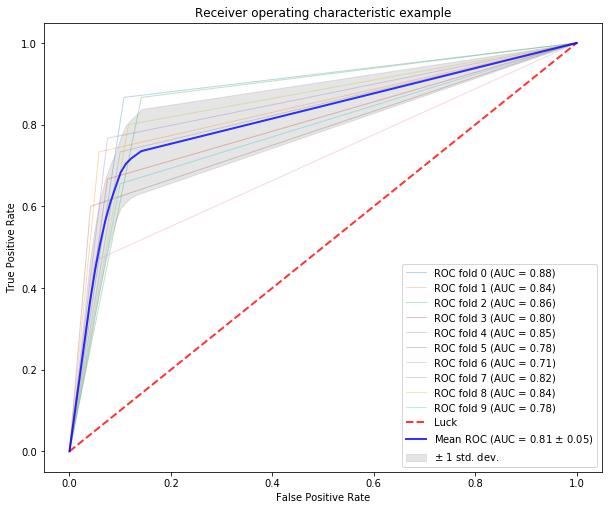

87.40% (+/- 1.61%)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 2975, 100)         306100    
_________________________________________________________________
dropout_621 (Dropout)        (None, 2975, 100)         0         
_________________________________________________________________
conv1d_621 (Conv1D)          (None, 1487, 300)         90300     
_________________________________________________________________
conv1d_622 (Conv1D)          (None, 743, 150)          135150    
_________________________________________________________________
conv1d_623 (Conv1D)          (None, 371, 75)           33825     
_________________________________________________________________
flatten_207 (Flatten)        (None, 27825)             0         
_________________________________________________________________
dropout_622 (Dropout)        (None, 27825)             0 

In [222]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

kfold = StratifiedKFold(n_splits=10, shuffle=True)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
cvscores = []
for train, test in kfold.split(data,tags):
    category_train=to_categorical(tags[train])
    category_test=to_categorical(tags[test])
    model = Sequential()
    model.add(embedding_layer)
    model.add(Dropout(0.2))
    model.add(Conv1D(300, 3, padding='valid',activation='relu',strides=2))
    model.add(Conv1D(150, 3, padding='valid',activation='relu',strides=2))
    model.add(Conv1D(75, 3, padding='valid',activation='relu',strides=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(150,activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
    model1=model.fit(data[train], category_train, epochs=150, batch_size=10, verbose=0)
    predicts=model.predict_classes(data[test])
    # evaluate the model
    scores = model.evaluate(data[test], category_test, verbose=0)
    # Creating the Confusion Matrix
    cm = confusion_matrix(tags[test], predicts)
    print('Confusion matrix')
    print(cm)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(tags[test], predicts)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    print('AUC')
    print(roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
model.summary()